# Chapter 3 - Variational Method for Schrodinger Equation

In [113]:
import numpy as np
import matplotlib.pyplot as plt

## 3.2.1 The infinitely deep potential well

The general eigenvalue problem:

\begin{align}
H \bf{C} = E \bf{SC}
\end{align}

Procedures: 

1. find the $\bf{V}$ matrix that can transform the overlap matrix $\bf{S}$ into a unit matrix 
\begin{align}
\bf{V}^{\dagger} \bf{S} \bf{V}= \bf{I}
\end{align}

The matrix $\bf{V}$ can be found if we have a unitary matrix $\bf{U}$ that can diagonalize $\bf{S}$ into: 
\begin{align}
\bf{U}^{\dagger} \bf{S} \bf{U}= \bf{s}
\end{align}

\begin{align}
\mathbf{V}^{\dagger} \mathbf{S V}=\mathbf{s}^{-1 / 2} \mathbf{U}^{\dagger} \mathbf{S U S}^{-1 / 2}=\mathbf{I}
\end{align}
Thus, we use $V = \mathbf{s}^{-1 / 2} \mathbf{U}$


> putting all the orthogonal eigenvectors as columns for P.

2. Once we have the matrix $\bf{V}$, we can calculate the $\bf{H'}=\bf{V}^{\dagger}\bf{H}\bf{V}$, and $\bf{C'} = \bf{V}^{-1}\bf{C}$

3. Now, we can calculate the ordinary eigenvalue equation:
\begin{align}
\bf{H'C'}=E\bf{C'}
\end{align}


In [46]:
from numpy import linalg as LA
from scipy.linalg import eigh

In [60]:
# overlap matrix 

def overlap_matrix(m,n):
    if (n+m) % 2 == 0:
        s = 2/(n+m+5)-4/(n+m+3)+2/(n+m+1)
    else:
        s = 0
    return s 

def hamiltonian(m,n):
    if (n+m) % 2 ==0:
        s = -(8*(1-m-n-(2*m*n)))/((m+n+3)*(m+n+1)*(m+n-1))
    else:
        s = 0
    return s

In [90]:
Nlist = [5,8,12,16]
eigvalist = np.zeros((5,4))
for k,N in enumerate(Nlist):
    H = np.zeros((N,N))
    S = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            H[i,j] = hamiltonian(i,j)
            S[i,j] = overlap_matrix(i,j)

    #=====================================
    '''
    easiest solution is with the use of built-in solver
    '''
    eigvals2, eigvecs = eigh(H, S, eigvals_only=False)
    eigvalist[:,k] = eigvals2.T[:5]
#print(eigvalist)

In [100]:
#=====================================
'''
The hard-way
'''
N = 5
H = np.zeros((N,N))
S = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        H[i,j] = hamiltonian(i,j)
        S[i,j] = overlap_matrix(i,j)
    
# first step: calculate the matrix V
w, U = LA.eig(S)
s = np.linalg.inv(np.diag(np.sqrt(w)))
V = np.dot(s,U)

print('Check:',np.dot(V.T,np.dot(S,V)).round(4))
# second step: determine the H'
H_prime = np.dot(V.T,np.dot(H,V))

# third step: solve for the eigenvalue problem
eigvals1 = np.linalg.eig(H_prime)[0]
print(eigvals1)

Check: [[  3.4832 -11.0669  -3.966   -0.       0.    ]
 [-11.0669  42.9232  14.2424   0.      -0.    ]
 [ -3.966   14.2424   5.1119   0.      -0.    ]
 [ -0.       0.       0.       4.0734  -0.7226]
 [  0.      -0.      -0.      -0.7226   0.1647]]
[860.01808683   2.01540936  18.73609612  44.87124428   1.63944533]


## 3.2.2 Variational calculation for the hydrogen atom

In [107]:
p=4
q=4
a = [13.00773,1.962079,0.444529,0.1219492]
S = np.zeros((p,q))
H = np.zeros((p,q))

for i in range(p):
    for j in range(q):
        S[i,j] = (np.pi/(a[i]+a[j]))**(3/2)
        T = 3*(a[i]*a[j]*np.pi**(3/2))/(a[i]+a[j])**(5/2)
        A = -2*np.pi/(a[i]+a[j])
        H[i,j] = T + A

In [110]:
eigvals2, eigvecs = eigh(H, S, eigvals_only=False)
eigvals2

array([-0.49927841,  0.11321392,  2.59229957, 21.14436519])

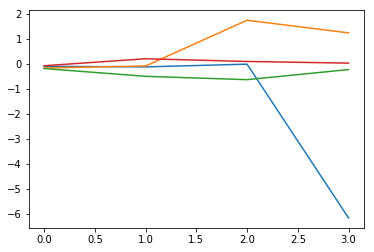

In [115]:
for i,t in enumerate(eigvecs):
    plt.plot(t)

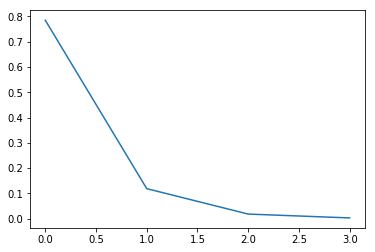

In [118]:
r = np.array([1,2,3,4])
psi = 2/(0.529)**(3/2)*np.exp(-r/0.529)
plt.plot(psi)